<a href="https://colab.research.google.com/github/Elgrande02/VUT-Machine-learning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# connecting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importation of the librairy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# Load the data
x_train = pd.read_csv('/content/drive/MyDrive/x_train.csv')
x_test = pd.read_csv('/content/drive/MyDrive/x_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train.csv')
y_train['target']=y_train['target']-1

In [4]:
# Drop the rows that we do not need 
x_train.drop(['Tosc','Tmix','m_power','Unnamed: 0'], inplace=True, axis=1)
x_test.drop(['Tosc','Tmix','m_power','Unnamed: 0'], inplace=True, axis=1)
y_train.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
# Drop any rows with missing values
x_test = x_test.dropna()
x_train = x_train.dropna()
y_train = y_train.dropna()

In [6]:
# Select columns to use as features (inputs) and target variable (output)
feature_columns = [1, 2, 3, 4, 5, 7, 8, 9]
target_column = 1

In [7]:
# Split the data into train, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
#x_test = x_val
#y_test = y_val

In [8]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


In [9]:
# Build a simple MLP model using Keras
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu', input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

In [10]:
# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model for 100 epochs with a batch size of 32, and use the validation set for early stopping the hyperparameter can be change to upgrade the efficiency
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=2)


Epoch 1/100
360/360 - 2s - loss: 0.2750 - accuracy: 0.9521 - val_loss: 0.0273 - val_accuracy: 0.9969 - 2s/epoch - 6ms/step
Epoch 2/100
360/360 - 1s - loss: 0.0157 - accuracy: 0.9986 - val_loss: 0.0115 - val_accuracy: 0.9984 - 709ms/epoch - 2ms/step
Epoch 3/100
360/360 - 1s - loss: 0.0099 - accuracy: 0.9988 - val_loss: 0.0064 - val_accuracy: 0.9990 - 697ms/epoch - 2ms/step
Epoch 4/100
360/360 - 1s - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 0.9987 - 698ms/epoch - 2ms/step
Epoch 5/100
360/360 - 1s - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0035 - val_accuracy: 0.9992 - 860ms/epoch - 2ms/step
Epoch 6/100
360/360 - 1s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9992 - 684ms/epoch - 2ms/step
Epoch 7/100
360/360 - 1s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0024 - val_accuracy: 0.9995 - 880ms/epoch - 2ms/step
Epoch 8/100
360/360 - 1s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9992 - 698ms/epoch - 2ms/

In [12]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)

# Make predictions on the test set using the trained MLP model
predictions = model.predict(x_test)

# Train and evaluate an SVM model for comparison
#y_train_svm = np.argmax(y_train, axis=1)
#y_val_svm = np.argmax(y_val, axis=1)+1


Validation Loss: 0.0007745666662231088
Validation Accuracy: 0.9997395873069763
120/120 [==============================] - 0s 2ms/step


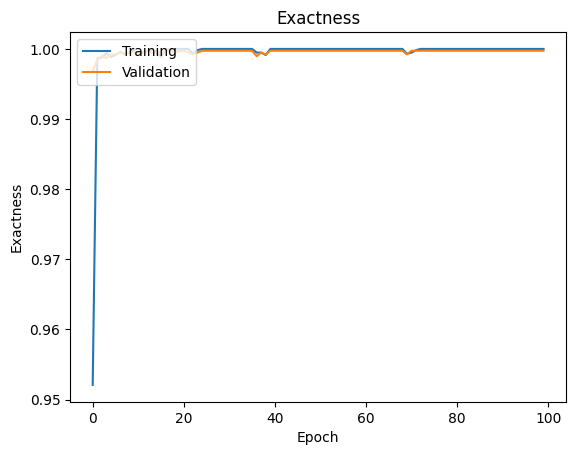

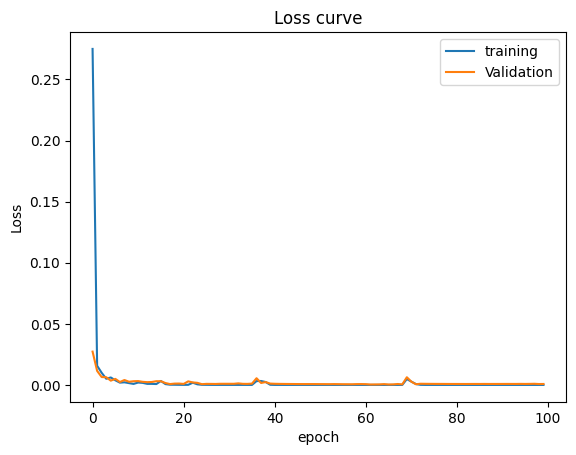

In [13]:
# Affichage de la courbe d'exactitude
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactness')
plt.ylabel('Exactness')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Affichage de la courbe de perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss curve')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training', 'Validation'], loc='upper right')
plt.show()

In [14]:
import time
svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)

# Train and evaluate the SVM model
start_time = time.time()
svm.fit(x_train, y_train)
svm_preds = svm.predict(x_val)
svm_acc = accuracy_score(y_val, svm_preds)
svm_time = time.time() - start_time

# Train and evaluate the MLP model
start_time = time.time()
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), verbose=0)
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=0)
mlp_time = time.time() - start_time

# Print the accuracy scores and training times
print("SVM Accuracy:", svm_acc)
print("SVM Training Time:", svm_time)
print("MLP Accuracy:", val_acc)
print("MLP Training Time:", mlp_time)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.9989583333333333
SVM Training Time: 0.4709327220916748
MLP Accuracy: 0.9997395873069763
MLP Training Time: 41.942482709884644


In [15]:
import time
# Define the hyperparameters to search over
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
# Create a GridSearchCV object with the SVM model and hyperparameters
svm_grid = GridSearchCV(svm, params, cv=5, verbose=2, n_jobs=-1)

start_time = time.time()

# Train the GridSearchCV object on the training set
svm_grid.fit(x_train, y_train)
svm_grid_time = time.time()-start_time
print("SVM grid trianing time", svm_grid_time)
# Print the best hyperparameters and accuracy score
print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM grid trianing time 14.384825944900513
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Accuracy: 0.9996527777777778


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


display the result


In [16]:
import pandas as pd

test_data = pd.read_csv('/content/drive/MyDrive/sample_file.csv')
test_ids = test_data['id']


In [17]:
import numpy as np
import pandas as pd

# Assuming your predictions are named "predictions" and the test IDs are in a numpy array called "test_ids"
output_df = pd.DataFrame({'id': test_ids, 'target': predictions.argmax(axis=1)+1})
output_df.to_csv('predictions.csv', index=False)


In [18]:
import pandas as pd

df = pd.read_csv("predictions.csv")
print(df.head())


   id  target
0   0       5
1   1       8
2   2       5
3   3       1
4   4       6


In [19]:
from google.colab import files
files.download('predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>